In [1]:
#Import the Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
import yfinance as yf

# Get the Stock Code
df = yf.download('MEBL.KA', start='2012-01-01', end='2019-12-17')

# Show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,11.544331,11.926766,11.148933,11.887874,6.639896,124624
2012-01-04,11.797127,11.829537,11.797127,11.829537,6.607311,30447
2012-01-05,11.829537,12.140670,11.797127,12.023995,6.715926,133387
2012-01-06,12.023995,12.153633,11.836018,12.056404,6.734028,141161
2012-01-09,12.056404,12.147151,11.998067,12.004549,6.705063,2622
...,...,...,...,...,...,...
2019-12-10,90.000000,90.000000,88.500000,89.500000,68.935715,205000
2019-12-11,89.000000,89.889999,88.500000,89.500000,68.935715,1185500
2019-12-12,91.699997,93.970001,89.500000,90.019997,69.336227,606000


In [3]:
#Get the number of rows and columns in the data set
df.shape

(2001, 6)

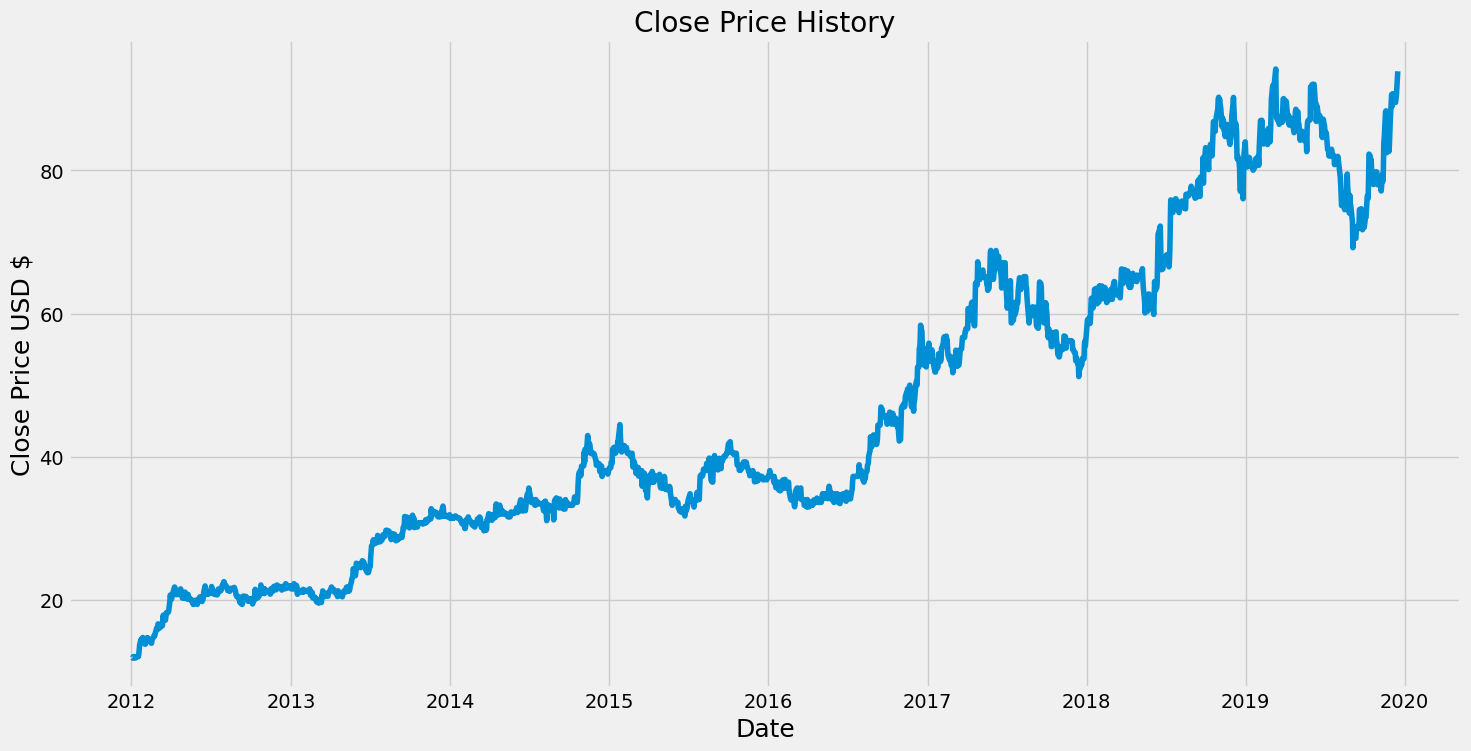

In [4]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with only the 'close column'
data = df.filter(['Close'])
#Convert the dataframe into numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1601

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[7.08452714e-04],
       [0.00000000e+00],
       [2.36155537e-03],
       ...,
       [9.49567988e-01],
       [9.56733170e-01],
       [9.96202128e-01]])

In [7]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.00070845, 0.        , 0.00236156, 0.00275514, 0.00212539,
       0.00015742, 0.00236156, 0.00196795, 0.00228283, 0.00259769,
       0.00787184, 0.0157437 , 0.02353684, 0.03188101, 0.0258984 ,
       0.03211716, 0.02959816, 0.03502975, 0.02912586, 0.02786636,
       0.02369427, 0.02369427, 0.02637071, 0.0347936 , 0.03148742,
       0.03345538, 0.03337666, 0.03188101, 0.02951945, 0.02739405,
       0.02865355, 0.02518994, 0.03030664, 0.03699771, 0.03841464,
       0.03731258, 0.04014646, 0.04825448, 0.05132449, 0.04856934,
       0.04856934, 0.05817302, 0.05659863, 0.05116704, 0.05297759,
       0.05431581, 0.0577007 , 0.05486682, 0.06454921, 0.07281466,
       0.06439177, 0.06622198, 0.06445082, 0.07029566, 0.07711467,
       0.07676043, 0.07676043, 0.07835449, 0.08349086, 0.08915862])]
[0.0951805700270531]



In [8]:
#Convert hte x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape the data 
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1541, 60, 1)

In [10]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Train the Model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1541/1541 [==============================] - 38s 21ms/step - loss: 7.7933e-04
Epoch 2/5
1541/1541 [==============================] - 33s 21ms/step - loss: 4.3957e-04
Epoch 3/5
1541/1541 [==============================] - 33s 21ms/step - loss: 2.9876e-04
Epoch 4/5
1541/1541 [==============================] - 33s 21ms/step - loss: 2.5818e-04
Epoch 5/5
1541/1541 [==============================] - 33s 22ms/step - loss: 2.1076e-04


In [13]:
#Create the testing data set
#Create a new array containing scaled values from index 1542 to 2002
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [14]:
#Convert the data into numpy array
x_test = np.array(x_test)

In [15]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
#Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 18ms/step


In [17]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test)**2))
rmse

3.6496149701118274

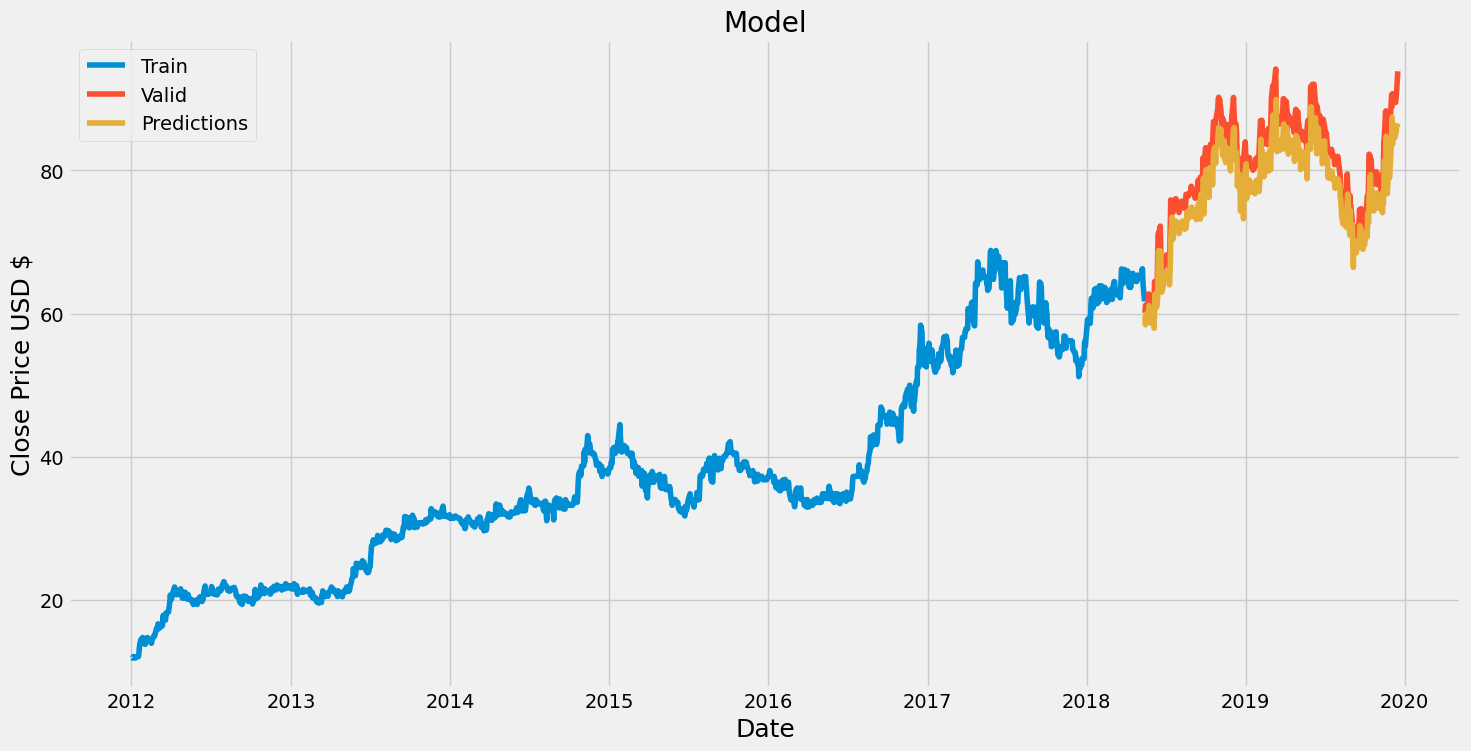

In [18]:
#Plot the data
train = data[:training_data_len]
x_valid = data[training_data_len:]

import pandas as pd

# Assuming you have a column named 'Close' in the 'data' DataFrame
valid = pd.DataFrame()
valid['Close'] = data[training_data_len:]['Close']
valid['Predictions'] = predictions


#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')
plt.show()

In [19]:
#Show the valid predicted price
valid

,Close,Predictions
Date,,
2018-05-15,60.082645,59.682842
2018-05-16,61.132233,58.417530
2018-05-17,61.181816,59.835430
2018-05-18,61.181816,59.938534
2018-05-21,60.330578,59.811104
...,...,...
2019-12-10,89.500000,85.220421
2019-12-11,89.500000,85.055298
2019-12-12,90.019997,85.275139


In [20]:
#Get the qoute
apple_qoute = df = yf.download('MTL.KA', start='2012-01-01', end='2019-12-17')


import yfinance as yf

# Download the data for the 'MEBL.KA' stock from the specified date range
apple_quote = yf.download('MEBL.KA', start='2012-01-01', end='2019-12-17')
# Create a new DataFrame with only the 'Close' column
new_df = apple_quote.filter(['Close'])
# Get the last 60 days' closing price values and convert the DataFrame to an array
last_60_days = new_df[-60:].values

#Scale the data to be  value between 0 and 1
# Assuming you have defined the 'scaler' object and scaled the 'last_60_days' data
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
X_test = []

#Append the past 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 49ms/step
[[90.50669]]


In [21]:
import yfinance as yf

# Download the data for the 'MEBL.KA' stock from a different date range
apple_quote = yf.download('MEBL.KA', start='2019-12-17', end='2019-12-19')

# Continue with the rest of your code using the 'apple_quote' DataFrame
# ...

# Print the 'Close' column
print(apple_quote['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2019-12-17    94.400002
2019-12-18    96.480003
Name: Close, dtype: float64
